In [113]:
import pandas as pd
from datetime import datetime
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import glob as glob

In [114]:
def simple_read(path):
    # path to data -> pandas DataFrame with time columns converted to date time
    with open(path) as f:
        # find the value in the file which tells you how many lines to skip to get to the table
        first_line = f.readline()
        header_line = int(first_line[0:-2].split(",")[0])-1
    data = pd.read_csv(path, sep=',', skiprows=header_line)

    # finds the location in the path containing the date
    acc = 0
    boo = False
    for letter in path:
        if letter == '2':
            boo = True
        elif boo and letter == '0':
            acc -= 1
            break
        acc += 1
        
    # creates datetime object with the date the data was collected
    dt = datetime(int(path[acc:acc+4]), int(path[acc+4:acc+6]), int(path[acc+6:acc+8])) 
    
    for column in data.keys():
        if 'Time' in column:
            # converts seconds after midnight columns to datetime
            data[column] = dt + pd.to_timedelta(data[column], unit='seconds')
    data.columns = data.columns.str.replace(' ', '')
    return data.replace(-9999, np.NaN) # Converts -9999 values to NaN

In [115]:
d_path = sorted(glob.glob('./ict_data/ARCSIX-DASH*'))

In [116]:
dash=[]
for i in range(0,len(d_path)):
    dash.append(simple_read(d_path[i]))

In [117]:
d = pd.concat(dash)

In [118]:
d = d[(d['RH']>80) & (d['RH']<90)]

In [119]:
dp = list(np.sort(d['Dp'].unique()))

In [139]:
RI = []
RI_len = []
for i in range(0, len(dp)):
    RI.append(d[d['Dp'] == dp[i]]['RI'].dropna())
    RI_len.append(len(RI[i]))

GF_len = []
GF = []
for i in range(0, len(dp)):
    GF.append(d[d['Dp'] == dp[i]]['GF'].dropna())
    GF_len.append(len(GF[i]))

In [121]:
dp_l = []
for i in range(0, len(dp)):
    dp_l.append(int(dp[i]))

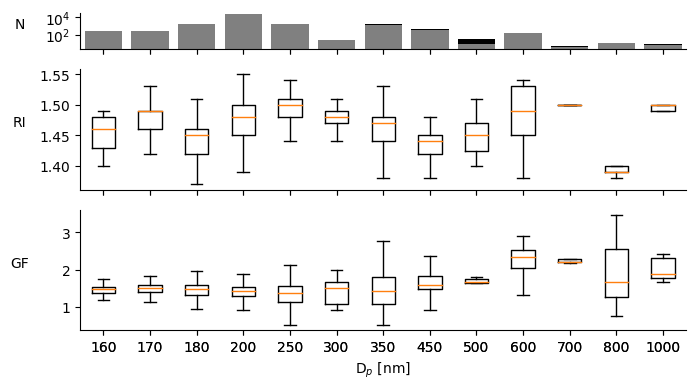

In [210]:
fig,ax = plt.subplots(3, sharex=True, gridspec_kw={'height_ratios': [.3, 1, 1]}, figsize=(7,4))

ax[1].boxplot(RI, labels=dp_l, showfliers=False)
ax[1].set_ylabel('RI', rotation=0)

ax[2].boxplot(GF, labels=dp_l, showfliers=False)
ax[2].set_ylabel('GF', rotation=0)
ax[2].set_xlabel('D$_p$ [nm]')
#ax[2].set_ylim([.4,3.6])

x = np.linspace(1,len(dp),len(dp))
ax[0].bar(x,RI_len, color='black')
ax[0].bar(x, GF_len, color='grey')
ax[0].set_yscale('log')
ax[0].set_ylabel('N', rotation=0)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
#ax[0].spines['bottom'].set_visible(False)
#ax[0].spines['left'].set_visible(False)


for a in ax:
    a.yaxis.set_label_coords(-0.1, 0.5)
plt.tight_layout()
plt.savefig('./figures/ri_gf.png', dpi=500, bbox_inches='tight')